<h1> Welcome to the Southern Water Corp Python Case Study!</h1>

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

You might have realised that whilst `Excel` is powerful, it was a bit tricky creating Box Plots, multiple line plots and in general, doing quick analysis in Excel.

In this Case Study, we're going to *revisit* the Pump Data, but add in a few different questions that help us better see how we can use Python to speed up our analysis as well as showing you how powerful Python's plotting and modelling libraries can be! 


<b>`Please note that this case study is composed of two parts** — once you have completed part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to part 2.`</b>

<H3>  Let's get started! </H3>

<img src = 'https://www.sdcwa.org/wp-content/uploads/2020/10/Seawater-Desalination.jpg'>

---

# Part I: <span style="color:green">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis. You will need the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study so we encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.


## Place your code here

In [2]:
#Import Libraries

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for questions 10 Onwards.




<h3> Please complete the following below: </h3>

i. Import each of the two data sources and store them into their individual dataframes. 

We suggest you use the names : **dataframe_raw & dataframe_stdev respectively**. 

ii. Print descriptive statistics for each of the dataframes using **.describe()** and **.info()**

In [3]:
# Import each of the two data sources and store them into their individual dataframes.

#Df_raw contains all the raw pump data and store as dataframe_raw
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')

#Df_Rolling_stdev contains all the rolling standard deviation data and stored as dataframe_stdev
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')


In [3]:
# Print descriptive statistics for raw data using .describe() and .info()
print(dataframe_raw.describe())
print(dataframe_raw.info())

## Print descriptive statistics for raw data using .describe() and .info()
print(dataframe_stdev.describe())
print(dataframe_stdev.info())


       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

<b> When looking at the Descriptive Statistics for both datasets; pay attention specifically to the standard deviation and mean. 
What do you observe when you compare the dataframe_raw standard deviation and mean, versus the dataframe_stdev standard deviation and mean?
    
Place your answer below. </b>


When looking at the standard devation and the mean for both dataframe_raw and dataframe_stdev data, the stdev and mean both largely spreads out and there is large variation in dataframe_raw which means the data is not consistent. But when looking at the dataframe_stdev data the stdev and mean are having a small variation with close spread out between the data points. which means the data is consistent.



---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

i) Using the dataframe, create a boxplot visualising this information.

ii) Using the dataframe, create a lineplot visualising this information.


<h3> Please put your code here </h3>


<Axes: title={'center': 'Box Plot: Std Dev Data'}>

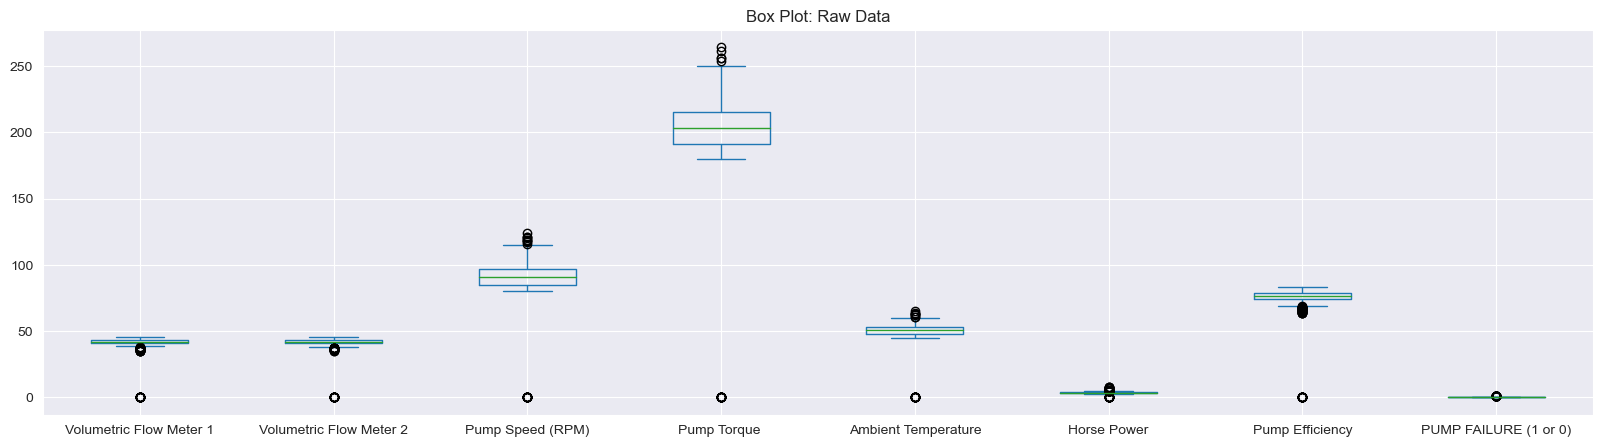

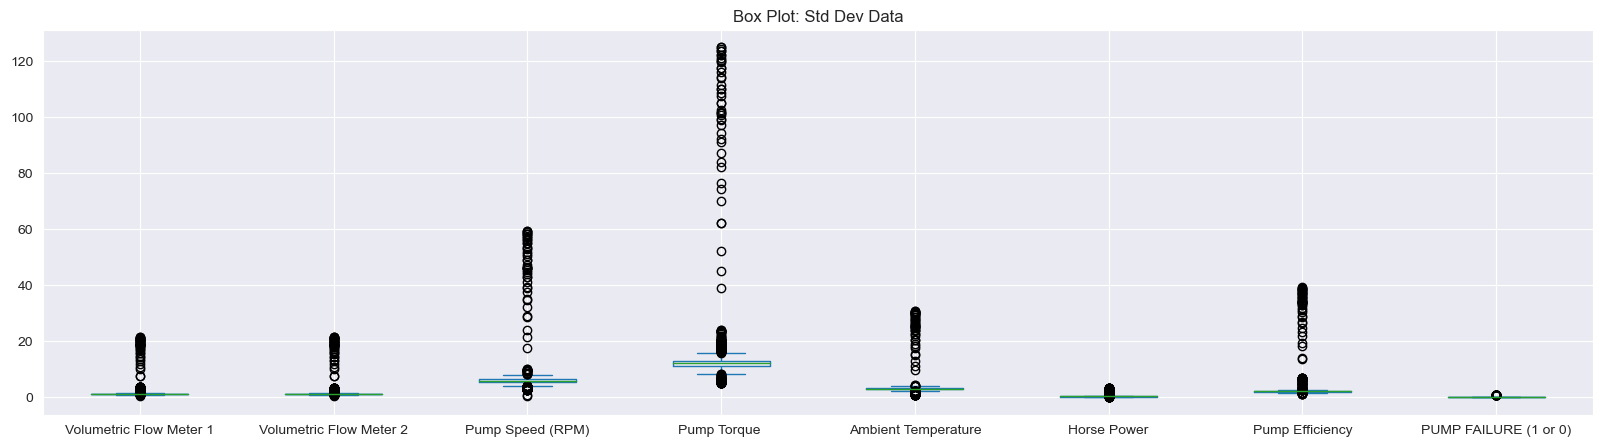

In [4]:
#i) Create a Box Plot for both dataframe

#Plotting Box Plot for raw Data 
dataframe_raw.plot(kind='box',title='Box Plot: Raw Data')

#Plotting Box Plot for std dev data
dataframe_stdev.plot(kind='box',title='Box Plot: Std Dev Data')

<Axes: title={'center': 'Line Plot: Std dev Data'}>

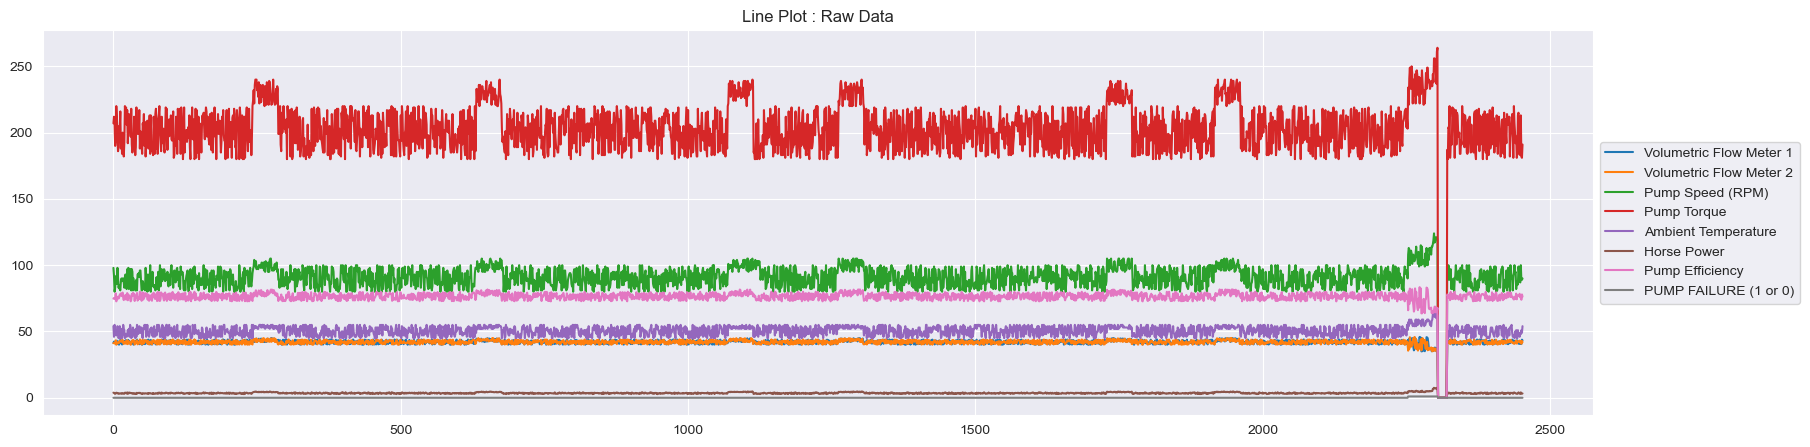

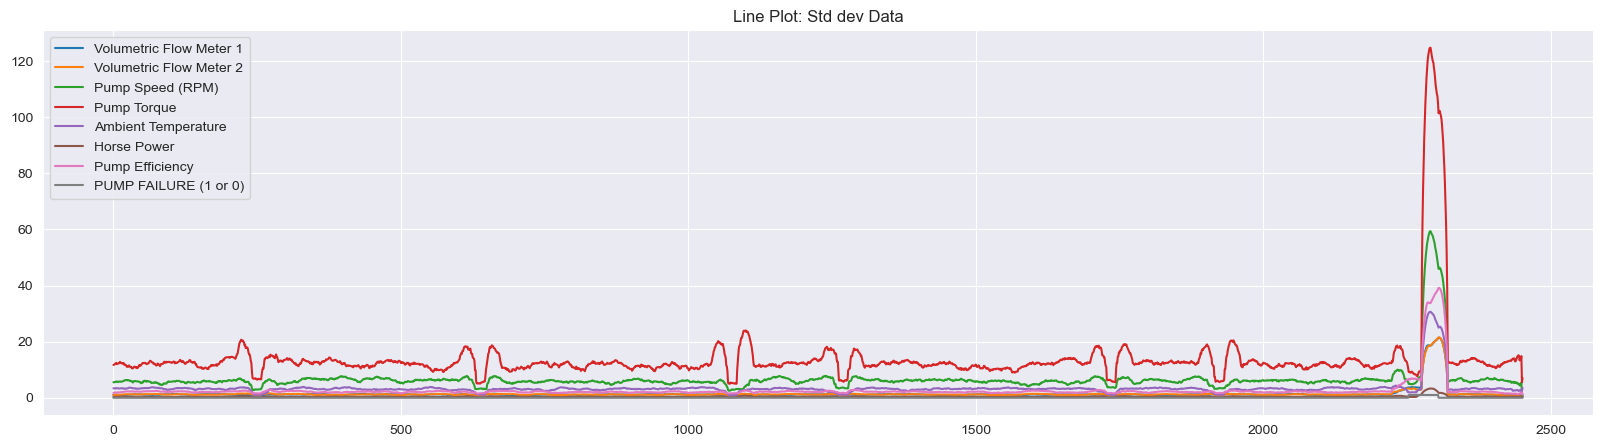

In [5]:
#ii)Create lineplot for both dataframe

#Plotting Line plot for raw data
dataframe_raw.plot(kind='line',title ='Line Plot : Raw Data')
plt.legend(loc='center left',bbox_to_anchor = (1,0.5))

#Plotting line plot for std dev data
dataframe_stdev.plot(kind='line',title='Line Plot: Std dev Data')

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

* After looking at the boxplots of rolling mean and standard deviation we could infur that During Pump Failure, Pump Torque and Pump Speed are having largest variation.
* For the line plot we can infur that both pump torque and pump speed has more outliers than rest of the vairable.

---------------------------------------------------------------------------

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the Pump is Failing (1) or whether the Pump is behaving normally (0).  
    
It is very likely we will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, we should separate our datasets, filtering for when the Pump Failure is = 0 or when the Pump Failure =1 and see what trends emerge. 
    
This will require you to <b> SUBSET </b> your dataframe using *boolean filters*.

i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe. If you're not sure how to do this, re-read the hints we've given above and pay careful attention to the Syntax we've shown.



## Please put your code here

<Axes: title={'center': 'Box Plot: Raw Data When Pump Failure = 0'}>

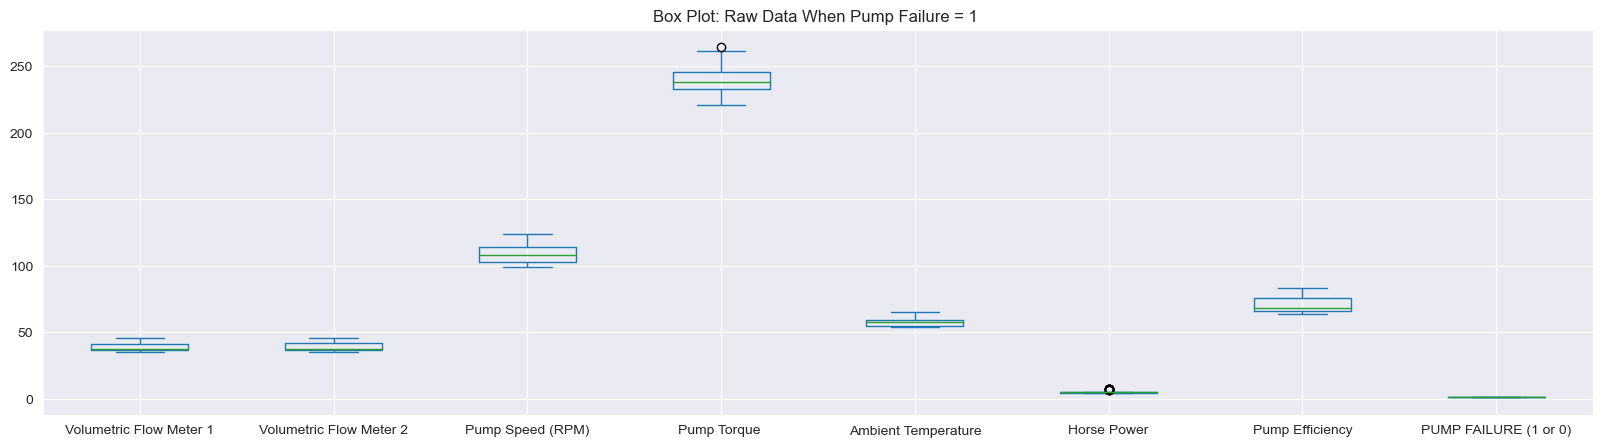

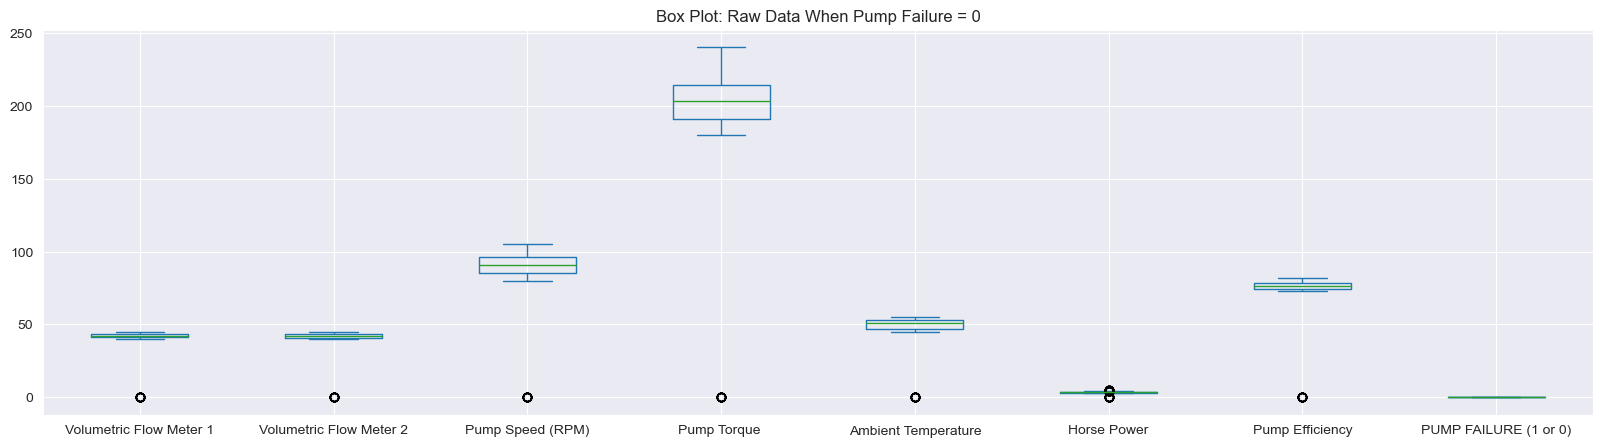

In [24]:
# i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1) and 0 (Pump is in normal operations).

#Creating box Plot when pump has failed for raw data
pump_failure1_rw = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 1]
pump_failure1_rw.plot(kind='box',title = 'Box Plot: Raw Data When Pump Failure = 1 ')

#Creating box plot when pump works normal for Raw data
pump_failure0_rw = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)'] == 0]
pump_failure0_rw.plot(kind = 'box', title = 'Box Plot: Raw Data When Pump Failure = 0')

<Axes: title={'center': 'Box plot; Std dev Data When Pump failure = 0'}>

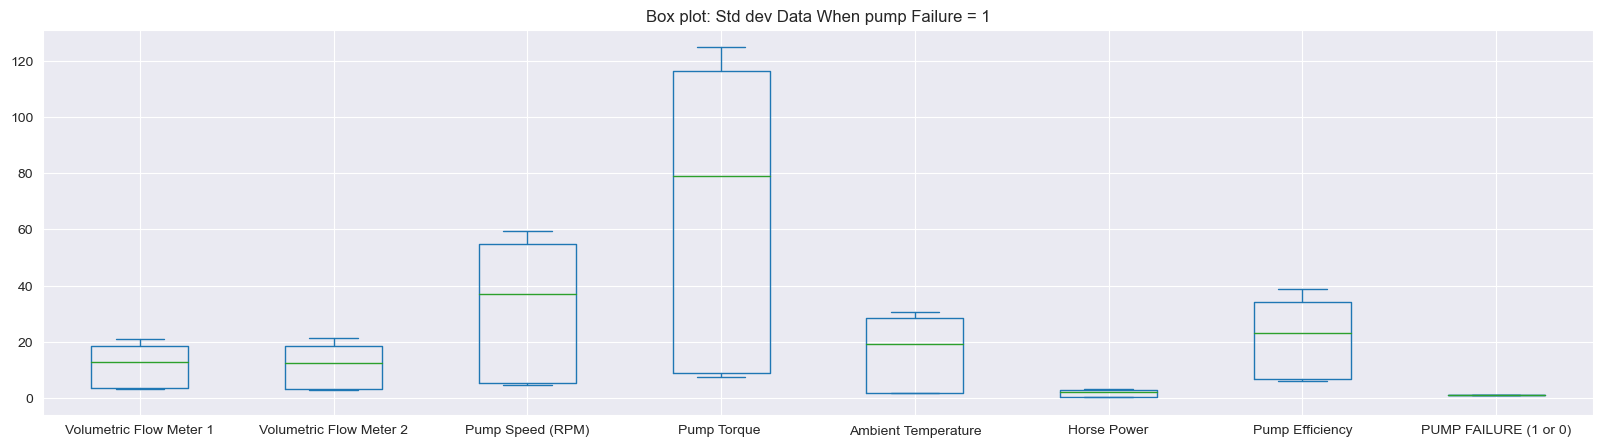

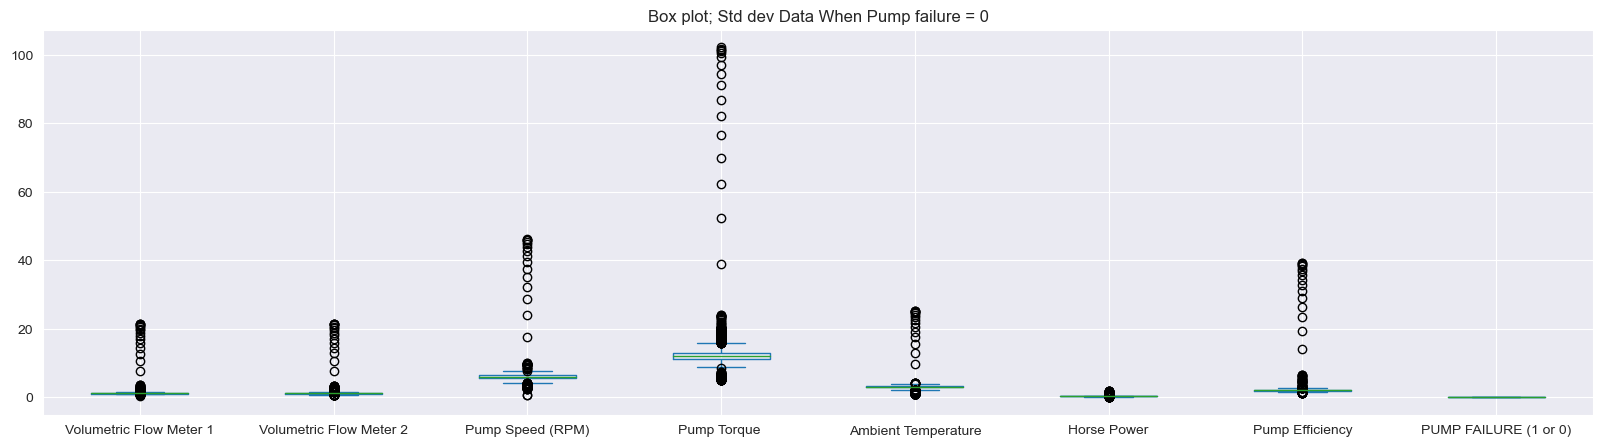

In [27]:
# ii) Using the dataframe_stdev dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1) and 0 (Pump is in normal operations).

# Creating box plot when pump has failed for std dev data
pump_failure1_std = dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)'] == 1]
pump_failure1_std.plot(kind= 'box',title = "Box plot: Std dev Data When pump Failure = 1")

pump_failure0_std = dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)']== 0]
pump_failure0_std.plot(kind='box', title = "Box plot; Std dev Data When Pump failure = 0")

<h3> What have you noticed when you compared the dataset in this manner? </h3>

* All the variables are now easier to see and see if there are outliers.
* Raw data box plots data points seems so scattered and data looks so in consistant for both failure and normal data.
* When looking at Rolling stdev failure data pump torque is the potential variabl for the failure and the normal data have outliers.

---------------------------------------------------------------------------

Now a quick analysis might show-case there are many *outliers* that exist in our dataset.

As we all know, Outliers can easily *skew* our analysis and we might want to remove them.


    1. Define the Quartiles Q1 and Q3. 
    
    2. Calculate the Interquartile Range (Q3 - Q1)
    
    3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
    
    4. Using Boolean Subsetting, filter the Dataframe for Outliers and remove them
    
    5. Calculate what the proportion of Outliers exist (i.e. Number of entries left after Outlier removal / Number of total entries in dataset) 

</b>

### Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i) Q1 should contain the <b> 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile </b> for all the columns in the dataframe.

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

We've included a sample of the IQR output below for your reference!

## Please put your code here

In [30]:
# i) Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe. 

# Creating Quartile 1: Q1 for raw data
Q1 = dataframe_raw.quantile(0.25,numeric_only = True)

#Creatng Quartile 3: Q3 for raw data
Q3 = dataframe_raw.quantile(0.75,numeric_only = True)

# ii)calculate the interquartile range (IQR = Q3 - Q1) for all columns in the dataframe and print it to the screen.
#Calculate interquartile range
IQR = Q3-Q1
print(IQR)




Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

Now let's work out how we can identify these Outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the dataframe to include *only* the Outliers. How many Outliers do we have?</b>
   
<b> iii) What is the percentage of data that remains after we've removed the Outliers from the dataframe_raw dataset?</b>
    

## Please put your code here

In [39]:
#Total number of entries in the dataframe
print("Length of Raw data: ", len(dataframe_raw))

#i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

#identifying how many outliers do we have
outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]
print("Number of outliers:", len(Outliers))


#Proportion of outliers in dataframe
Proportion = round((len(dataframe_raw) - len(outliers))/len(dataframe_raw)*100,2)
print("Proportion of data: ",Proportion,"%")

Length of Raw data:  2453
Number of outliers: 95
Proportion of data:  96.13 %


<b> Now that you've removed the Outliers and discovered you still have a significant amount of data left - do you think removing Outliers is problematic or not? Please state your answer below and explain what your thoughts are. </b> 


By removing outliers in data can help significant impact on overall analysis if the value is a true outlier, an it helps for better analysis and it result in unbiased results.

---------------------------------------------------------------------------

Now in the previous exercise, we've identified how we can calculate Outliers. Now we want to remove *all* the outliers in our dataset and see what this looks like in our box plots. 

We've defined our Outliers dataframe as per below:

`Outliers = dataframe_raw[((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]`

<b> We're now going to add one symbol that will help us return a dataframe with 0 Outliers.

This is the ~ Symbol. </b>

Essentially this Symbol tells Python to 'invert' the current boolean Value from True, to False.

An example use of this syntax would be:
    
    some_dataframe = some_dataframe[ ~ ( (some_condition) ) ]


### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

i) Create a new dataframe called no_outliers and using the ~ operator, remove all the Outliers from the dataframe <p>
ii) Using the no_outliers dataframe, create two box plots as per below: <p>
    <li> A boxplot when PUMP FAILURE is 1 (Failure) </li>
    <li> A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li> 

<b> Did any of your plots reveal nothing to plot? If yes, why might that be...? Think very carefully regarding what you have performed. </b>


## Please put your code here

Length of raw data:  2453
Lenght of raw data after removing outliers:  2358


<Axes: title={'center': 'Box Plot when Pump Failure is 0 (Normal Behaviour)'}>

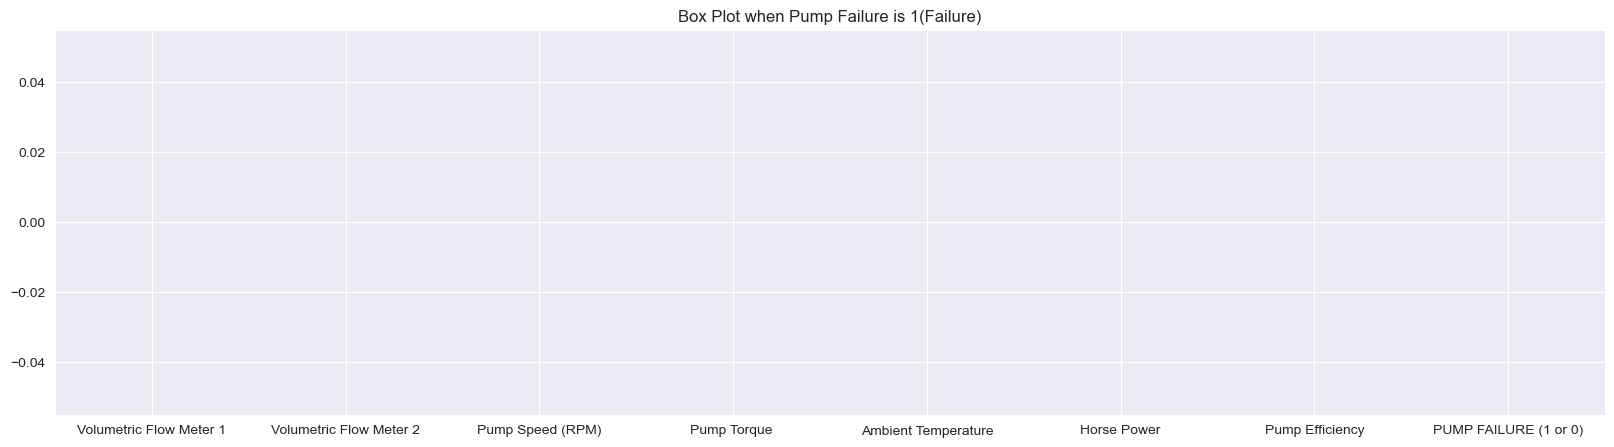

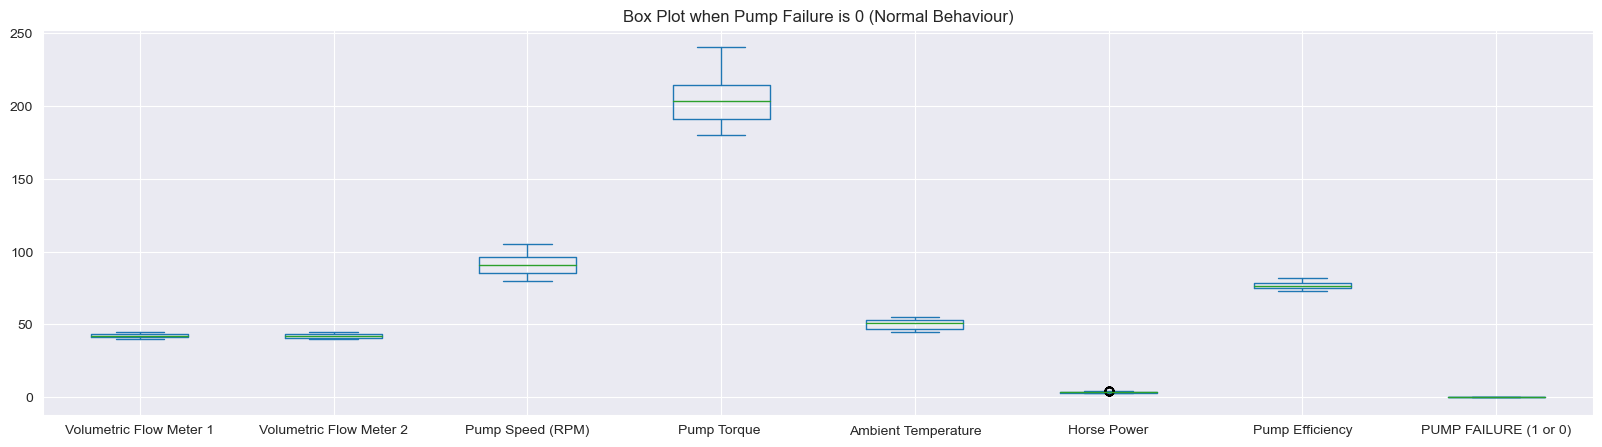

In [45]:
#i) Create a new dataframe called no_outliers and using the ~ operator, remove all the Outliers from the dataframe
no_outliers = dataframe_raw[~((dataframe_raw[IQR.index] < lower_limit) | ((dataframe_raw[IQR.index] > upper_limit))).any(axis=1)]
print("Length of raw data: ", len(dataframe_raw))  
print("Lenght of raw data after removing outliers: ",len(no_outliers))

#ii)Using the no_outliers dataframe, create two box plots as per below:
pump_failure1 = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 1]
pump_failure1.plot(kind = 'box',title ="Box Plot when Pump Failure is 1(Failure)")

pump_failure0 = no_outliers[no_outliers['PUMP FAILURE (1 or 0)'] == 0]
pump_failure0.plot(kind='box', title = 'Box Plot when Pump Failure is 0 (Normal Behaviour)')

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 



As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the dataframe and plot each individual variable out and compare this with the Pump Failure for a more streamlined analysis.

This will require you to make use of the following syntax:

1. Define a list variable called `ListOfVariables`; this is to contain the column names of all the **numerical** variables you wish to iterate through in the `dataframe_raw` dataset <p>

2. Instantiate your for loop.
  
**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Failure (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. 


## Please put your code here

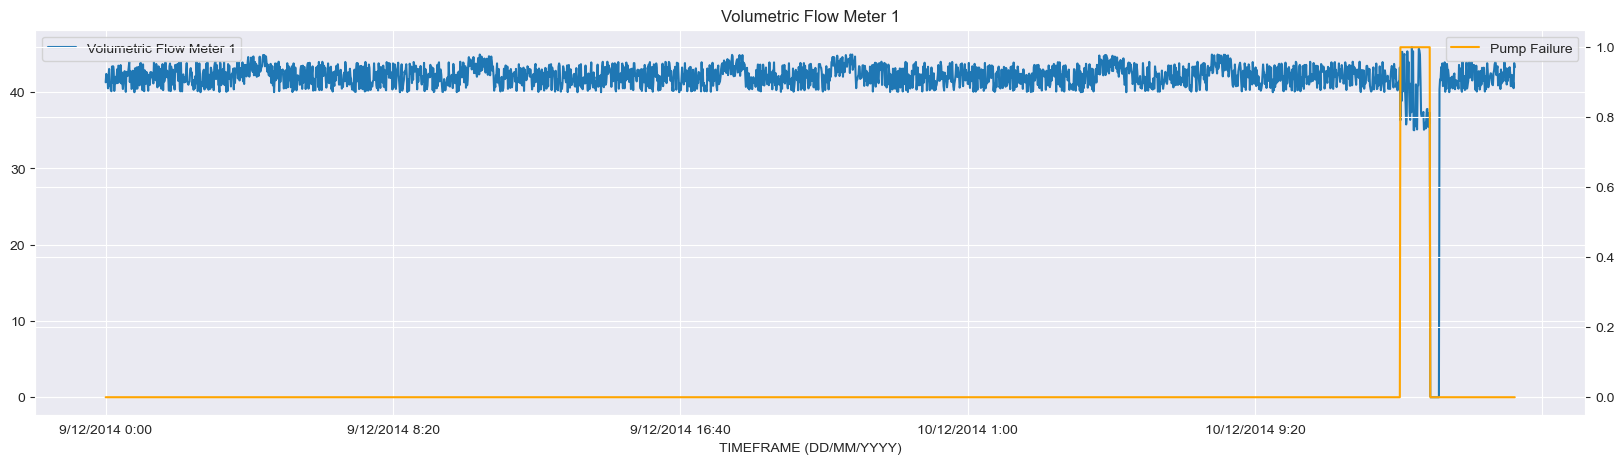

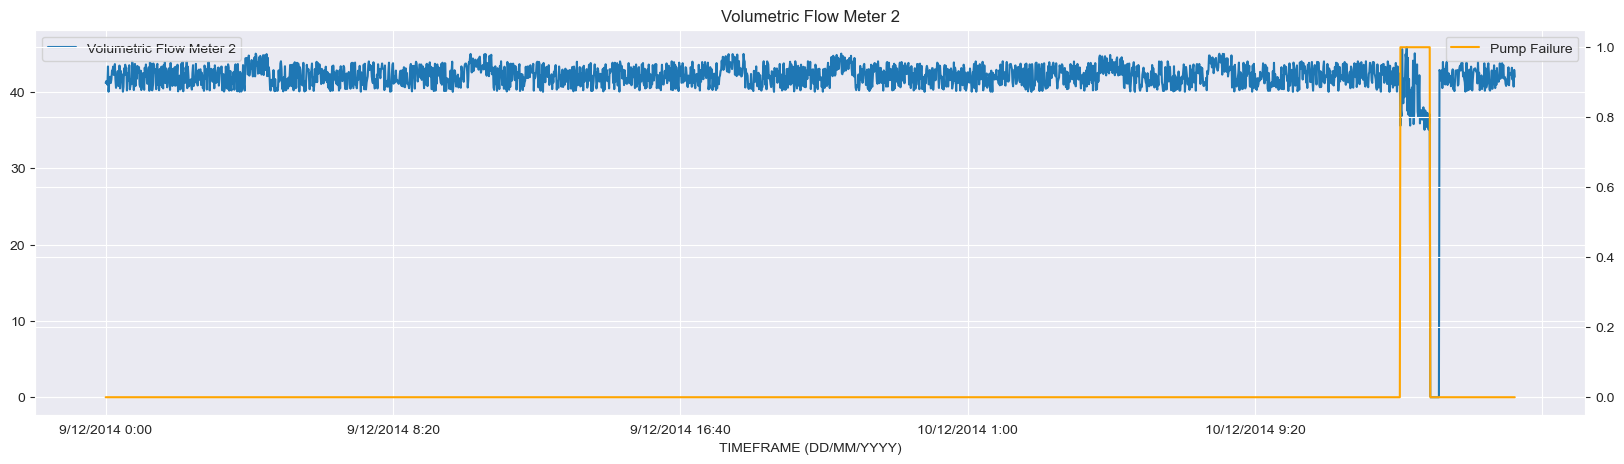

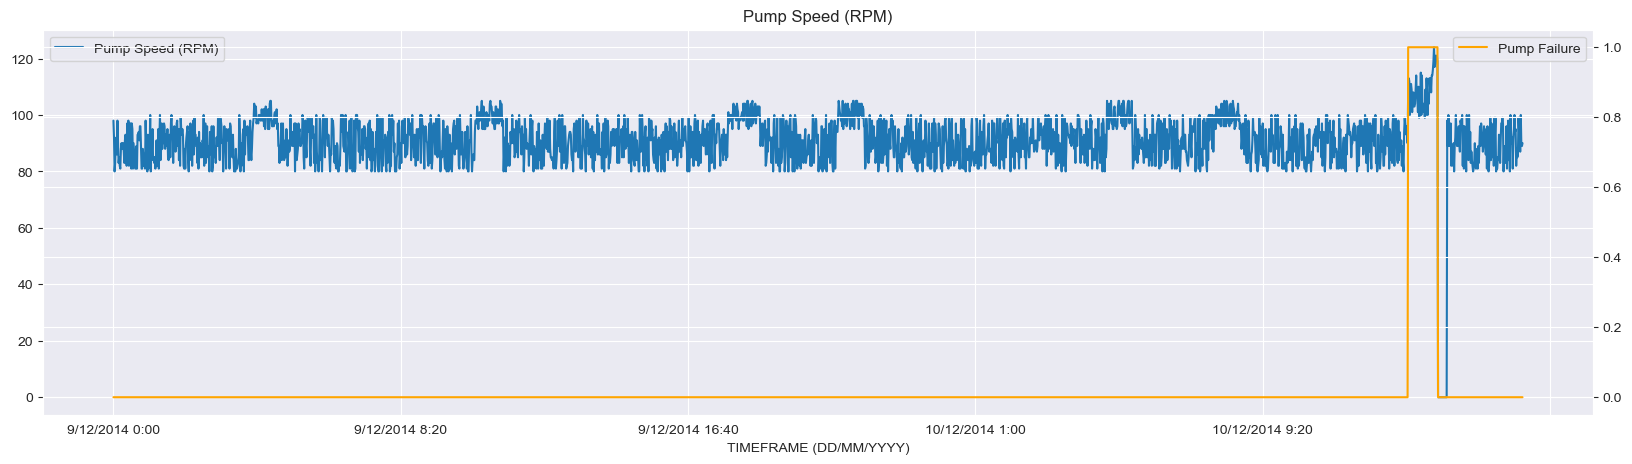

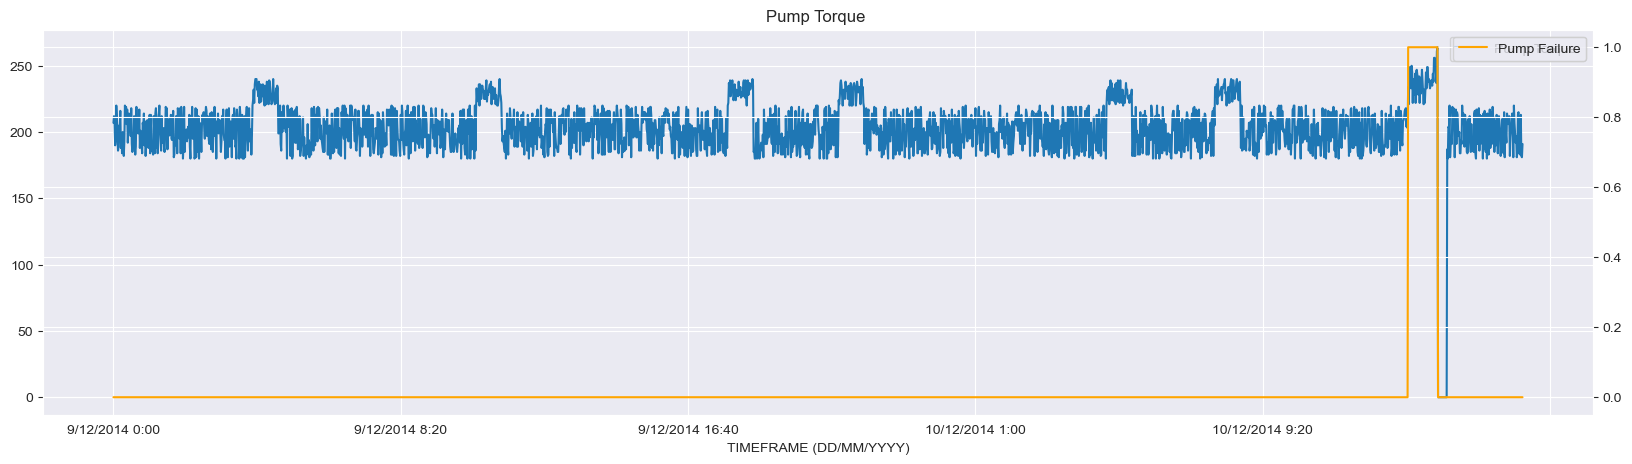

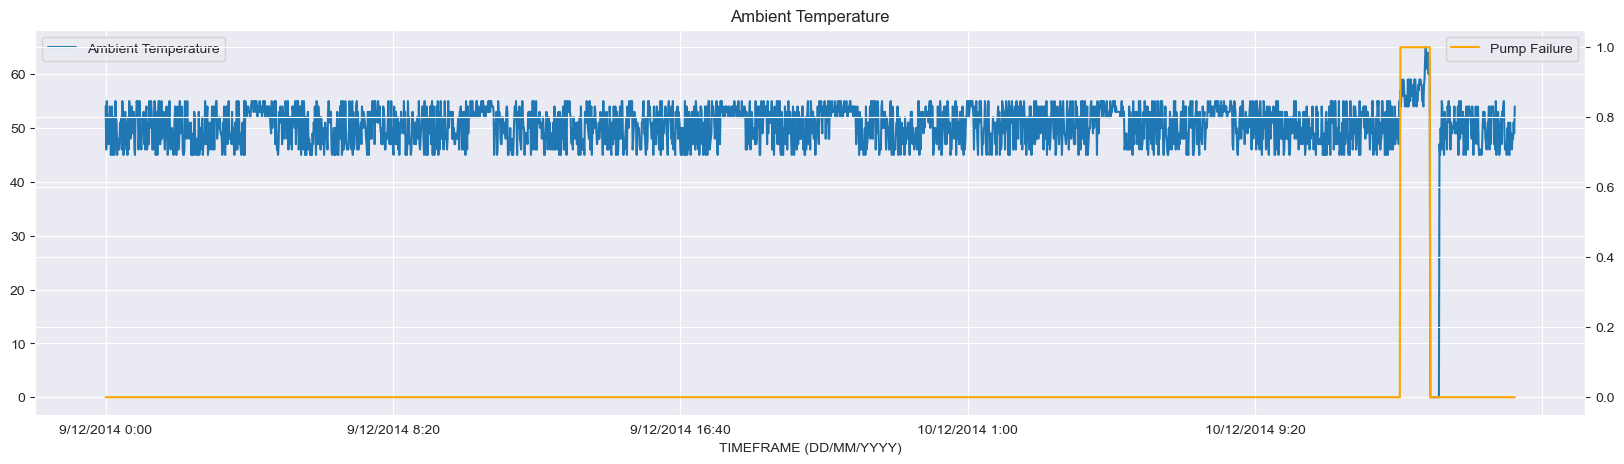

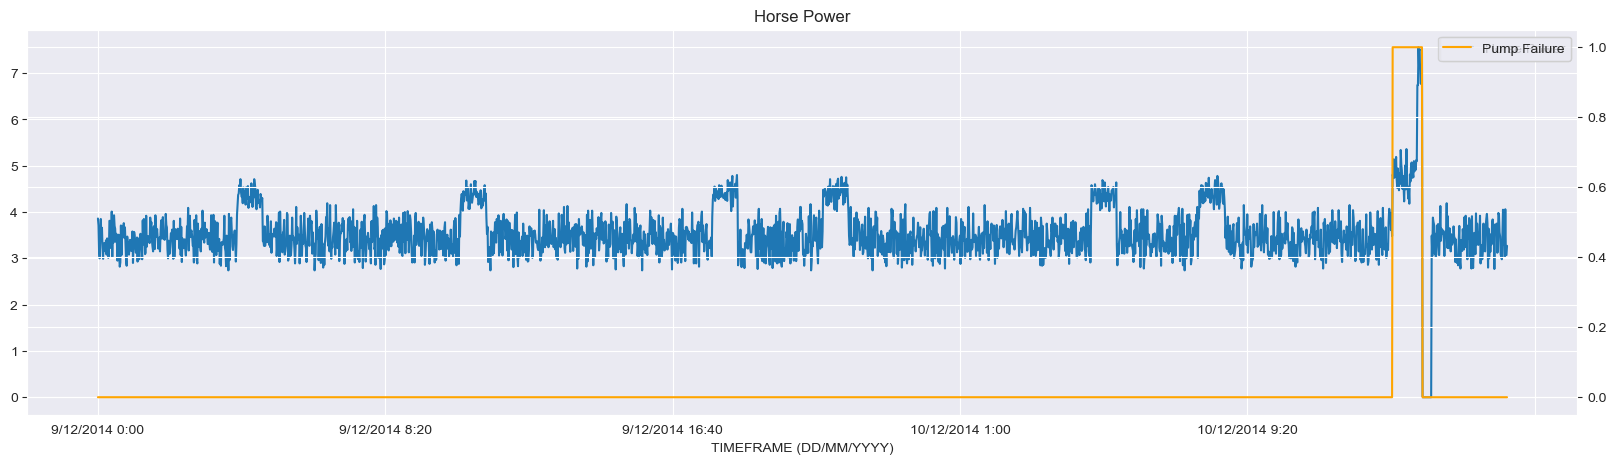

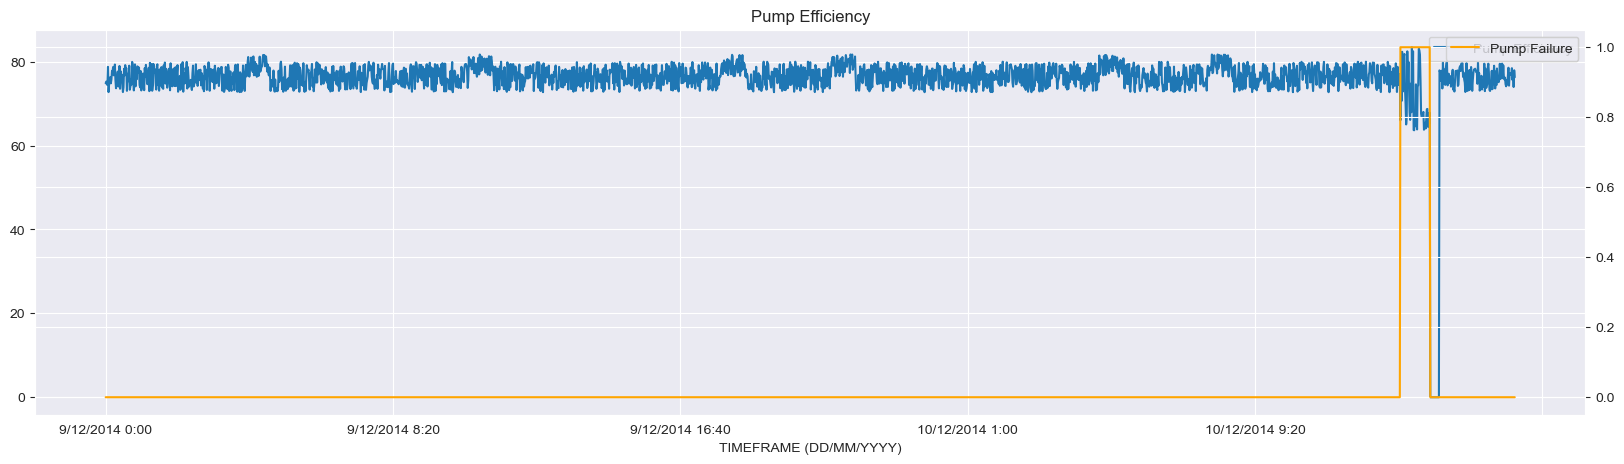

In [7]:
#Define a list variable contains all numerical variables

ListOfVariables = ['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)',
                   'Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']

# Instantiate for loop
for item in ListOfVariables:
    ax1 = dataframe_raw.plot(x='TIMEFRAME (DD/MM/YYYY)', y=item) #line plot for all item in list
    
    #Create secondary axis
    ax2 = ax1.twinx()
    
    #Add pump failure to secondary axis
    ax2.plot(dataframe_raw["PUMP FAILURE (1 or 0)"], color='orange', label='Pump Failure')
    ax2.legend()
    
    #Assign title for plot
    plt.title(item)
    
    #Display the plot
    plt.show()
  

    
    
 


<b> Have you noticed any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

From the above chart we can infur that when there is pump failure than the features such as pump speed, pump torque, ambient temperature and horse power have a sharp spike while rest of the attributes decreases.

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that you had previously defined in Q1, dataframe_stdev </span> </h3>



### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index of the dataframe_stdev** dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables you created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.


## Please put your code here

<h4> The output from your code should display image(s) like the one shown below </h4>

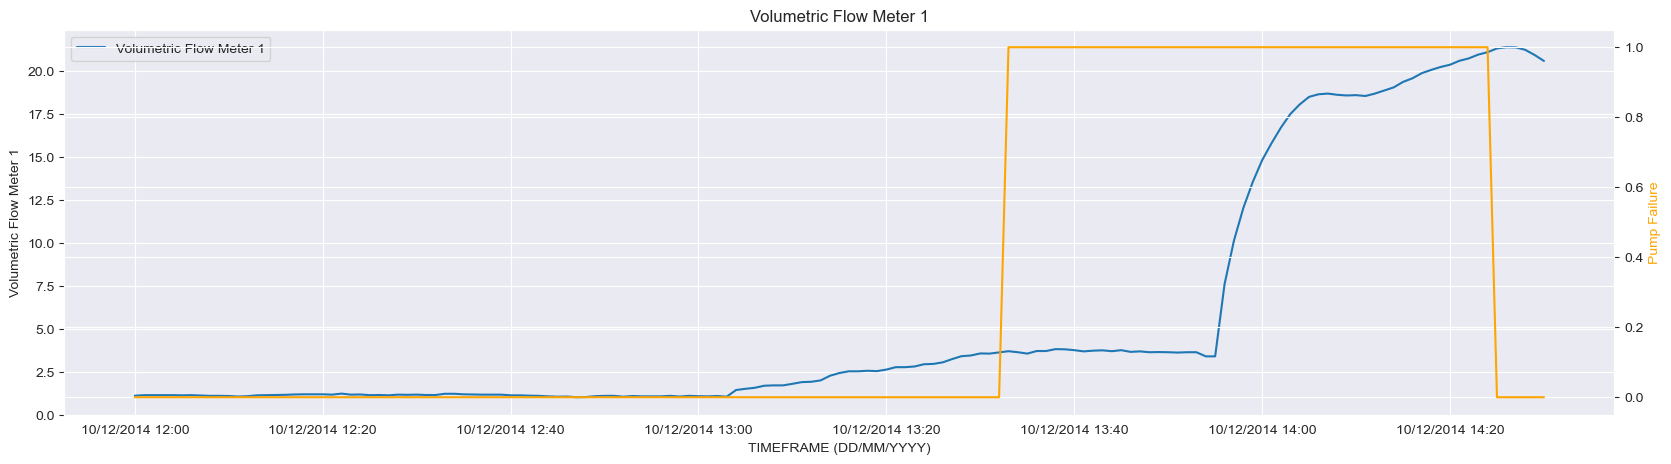

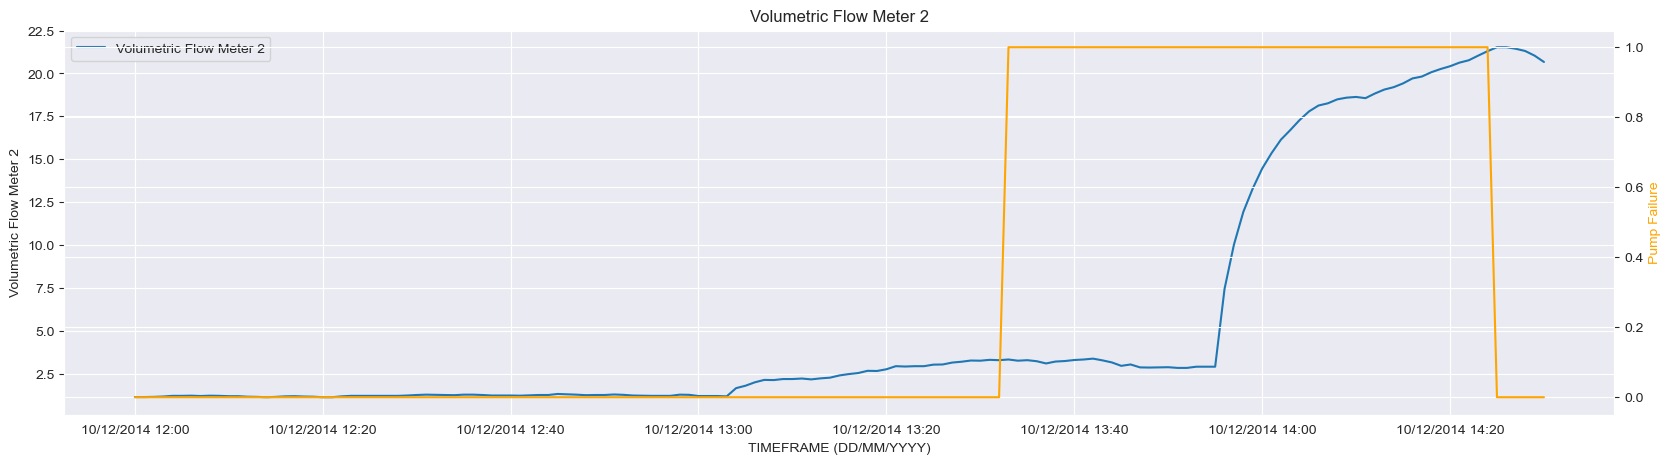

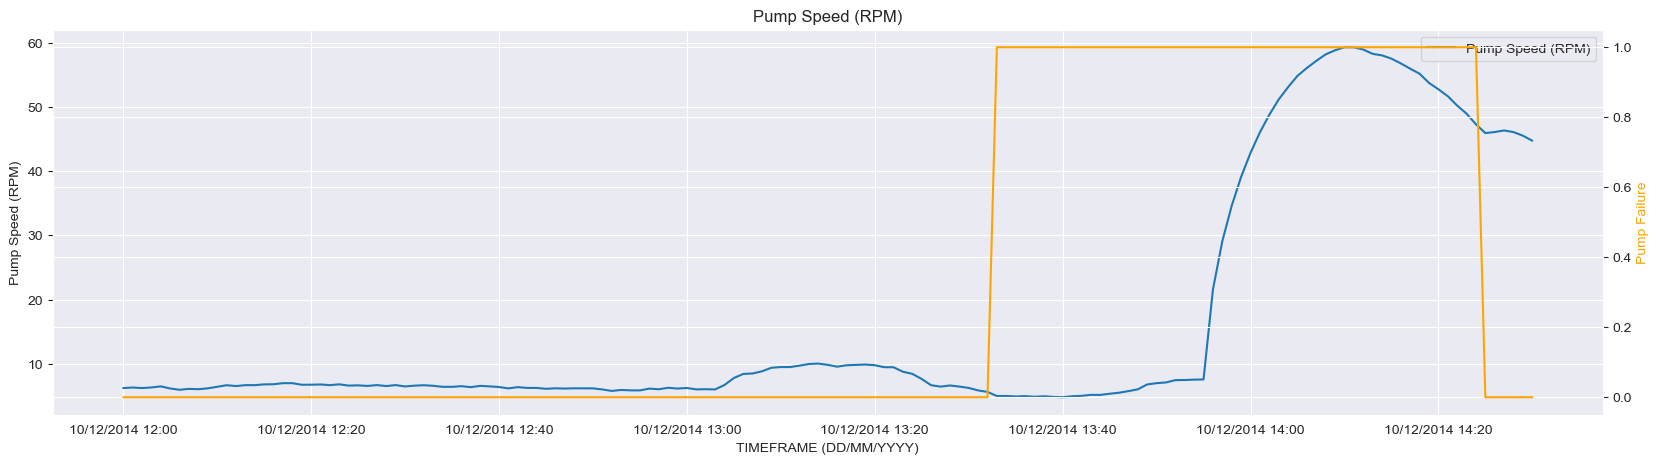

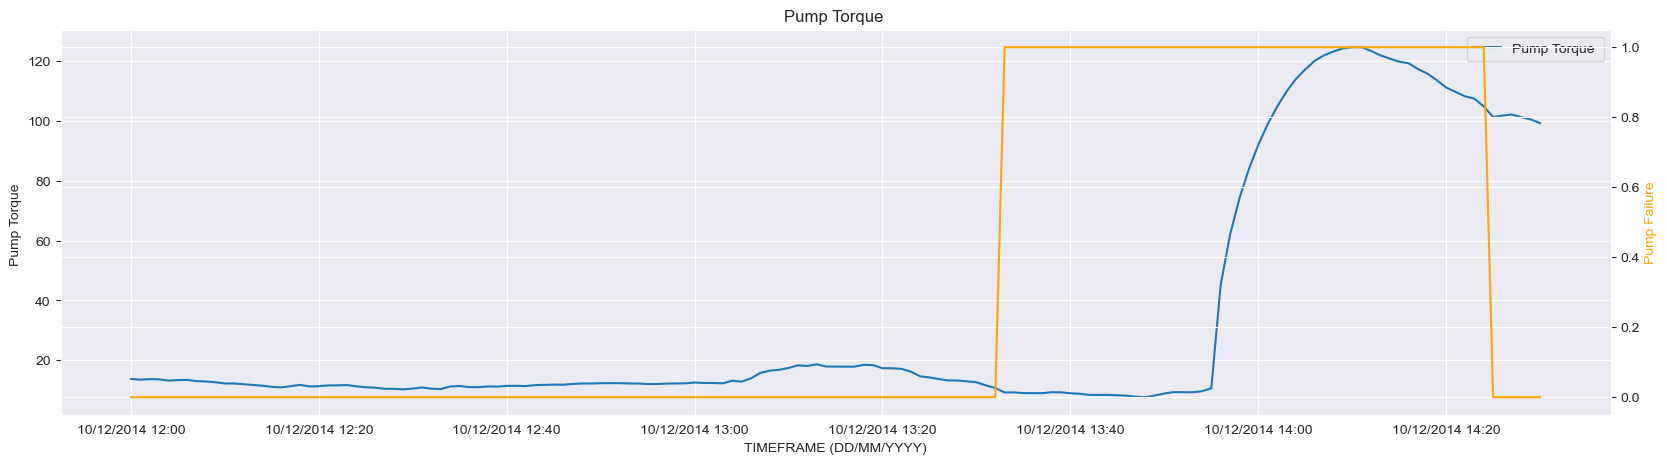

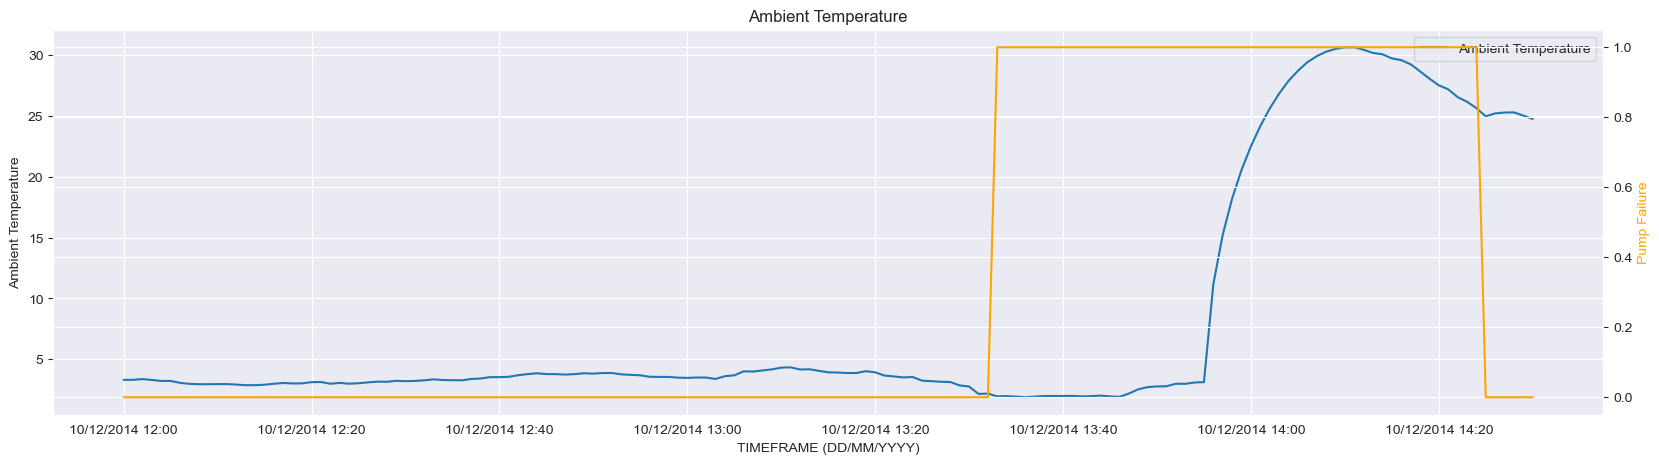

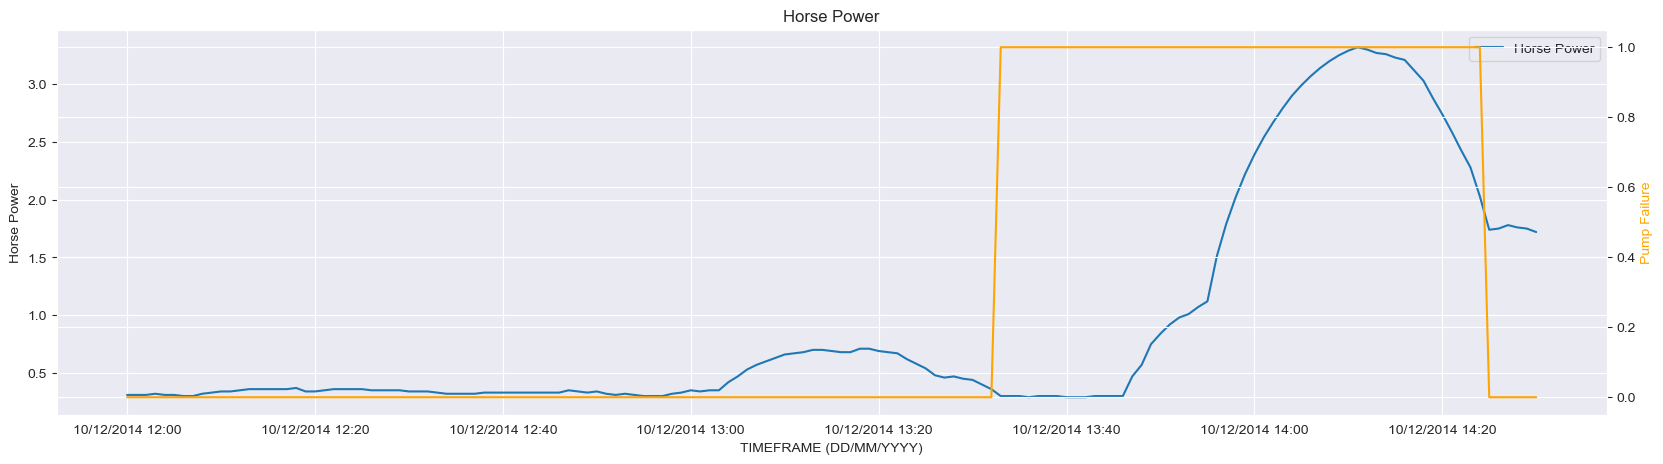

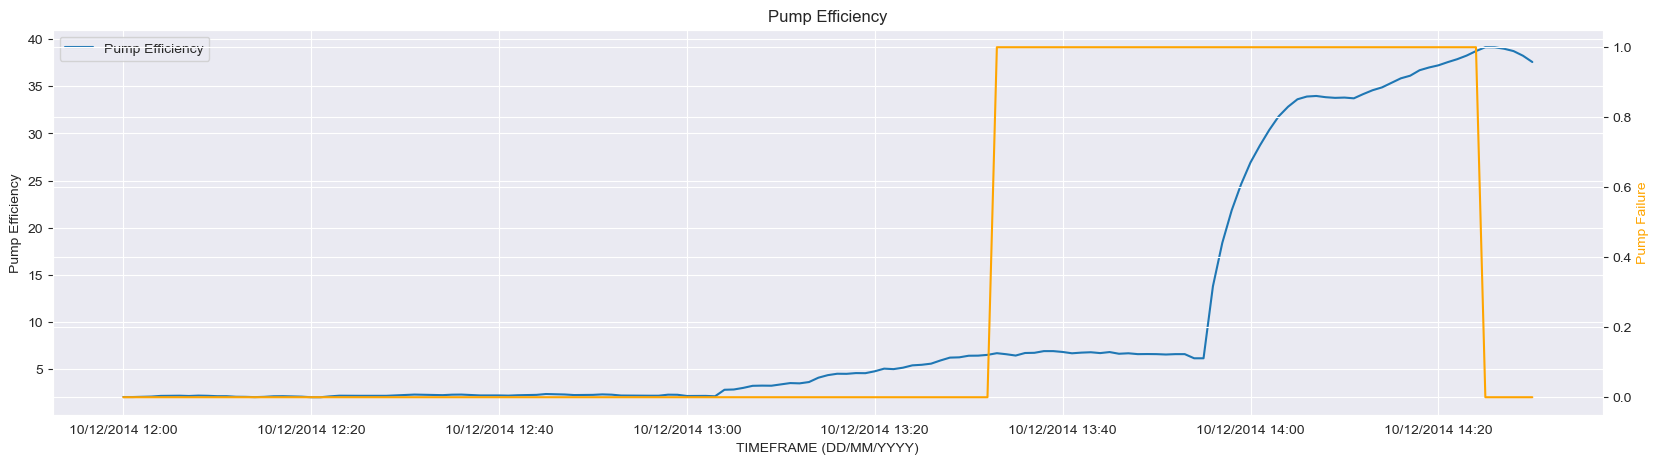

In [8]:
#i) Set the index of the dataframe_stdev
df = dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

#ii) Filtered the dataframe with the following time period: 10/12/2014 12:00 to 10/12/2014 14:30.
ListOfVariables = ['Volumetric Flow Meter 1','Volumetric Flow Meter 2','Pump Speed (RPM)',
                   'Pump Torque ','Ambient Temperature','Horse Power','Pump Efficiency']
filtered_df = df[(df.index >= '10/12/2014 12:00') &\
                              (df.index <= '10/12/2014 14:30')]

# Instantiate for loop
for item in ListOfVariables:
    fig, ax1 = plt.subplots() #Create fig and axis objects
    
    ax1 = filtered_df[item].plot()
    
    ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 time stamps
    #Assign label for y axis
    ax1.set_ylabel(item)
    
    #set the legend
    ax1.legend()
    
    ax2 =ax1.twinx() #Create secondary axis
    
    #Add pump failure to secondary axis
    ax2.plot(filtered_df['PUMP FAILURE (1 or 0)'],color='orange')
    
    ax2.xaxis.set_major_locator(plt.MaxNLocator(10)) 
    ax2.set_ylabel('Pump Failure',color ='orange') 
    
    plt.title(item) #Assign title
    
    plt.show()#Display the plot

---

# Part II: <span style="color:green">Inferential Statistical Analysis</span>


Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.


## Please put your code here

#### We've included an example of what the output *may* look like below

Text(0.5, 1.0, 'Heatmap for Raw data')

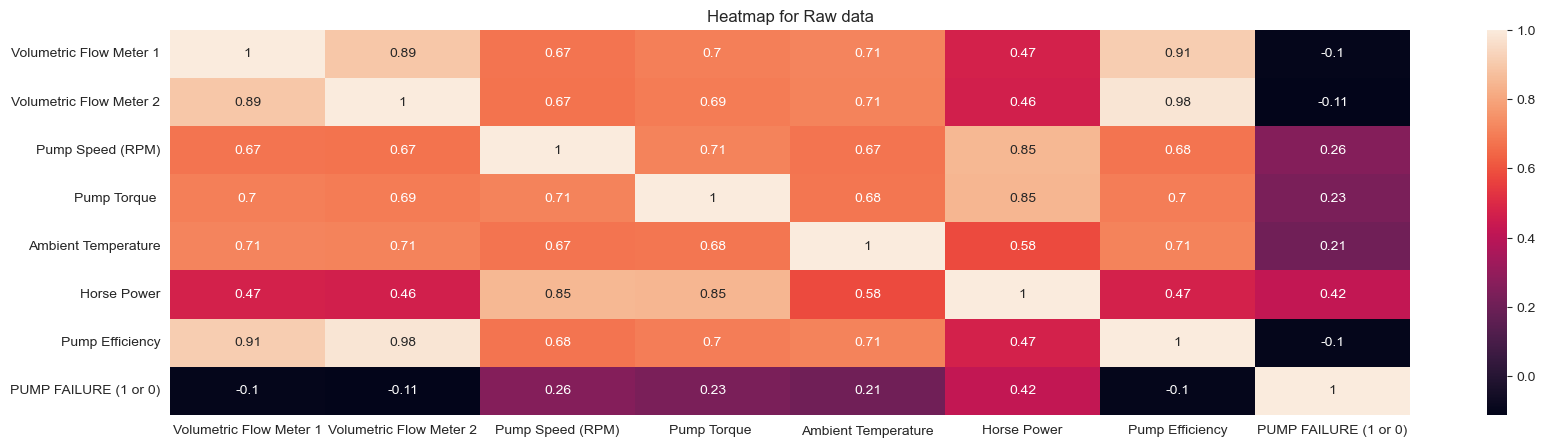

In [12]:
#create a heatmap that clearly shows the correlations for all variables

correlated_df_raw = dataframe_raw.corr(numeric_only=True)
sns.heatmap(correlated_df_raw,annot=True)
plt.title("Heatmap for Raw data")

**Which variables seem to correlate with Pump Failure?**


* Horse Power has the highest correlation to pump failure among all the variables. However it does not have a strong            correlation. 
* Volumetric meter 1, Volumetric meter 2 and Pump Efficiency have strong negative correlation with respect to Pump failure.


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated dataframe you've created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>



In [17]:
#Correlated dataframe
correlated_df_raw

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000




With this hint in mind, you should be able to **select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**. Don't forget to think about .sort_values() to help sort your data!

### Please put your code here

<Axes: title={'center': 'Correlated Bar Plot for Raw Data'}>

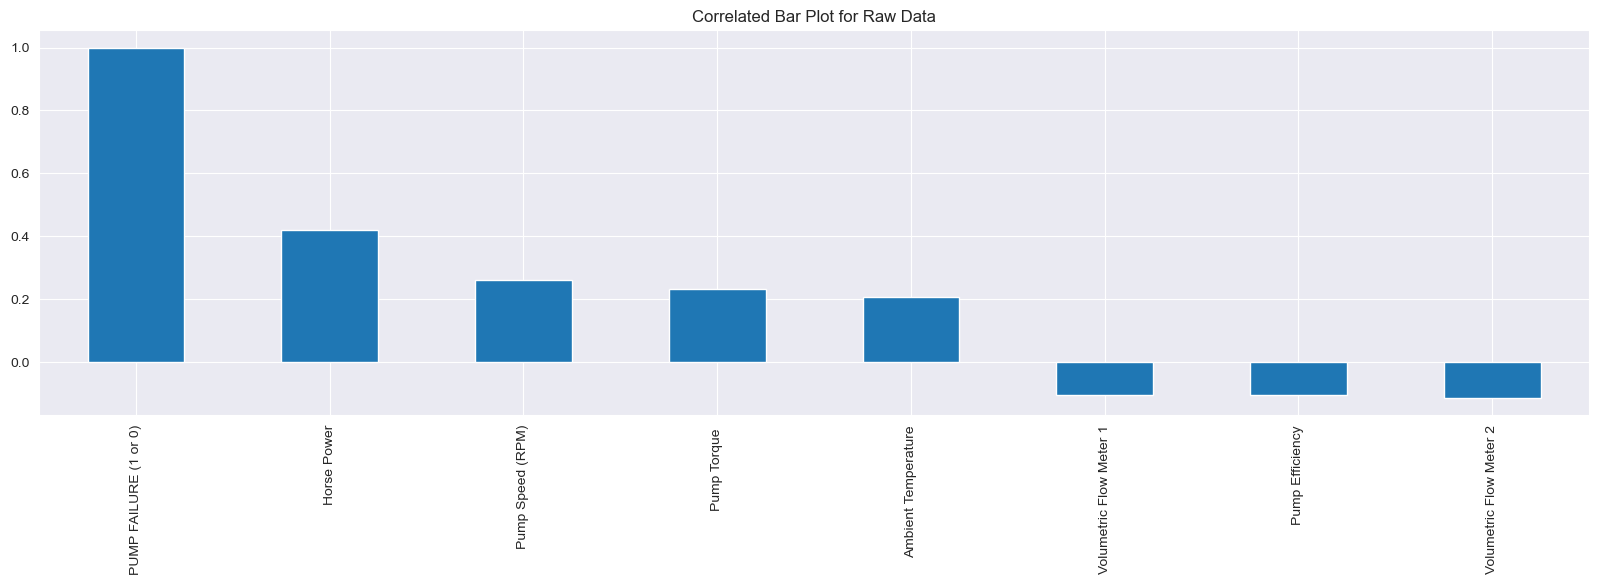

In [21]:
#Correlated bar plot against Pump Failure(1 or 0) in descending order
correlated_df_raw['PUMP FAILURE (1 or 0)'].sort_values(ascending=False).plot(kind='bar',title='Correlated Bar Plot for Raw Data')


---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


## Please put your code here

Text(0.5, 1.0, 'Heatmap for std dev data')

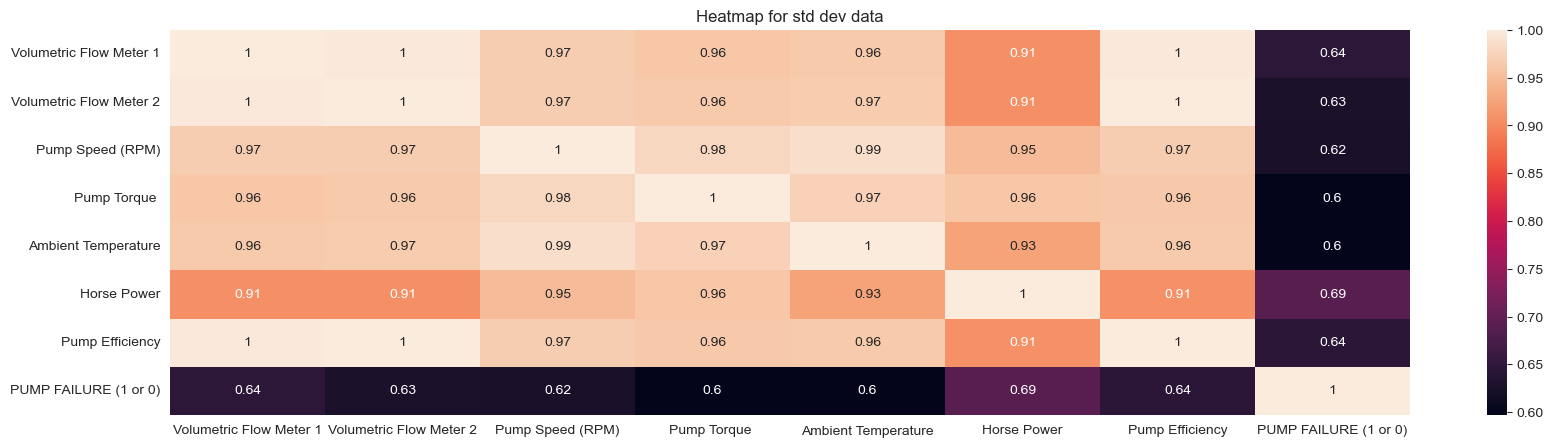

In [22]:
#Create a heatmap that clearly shows the correlations for all variables

correlated_df_stdev = dataframe_stdev.corr(numeric_only=True)
sns.heatmap(correlated_df_stdev,annot=True)
plt.title("Heatmap for std dev data")

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

* For the standard devation data all the variables has a perfect correlation as all the values lies between -0.8 to 0.8.

### Creating a Multivariate Regression Model



For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>


<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>

You will repeat the same steps as you have done in i) only you will be changing the dataset from dataset_raw to dataset_stdev. 


## Please put your code here 

In [26]:
#Regression Model for Dataframe_Raw 

#Create a regression equation that models the Pump Failure (Y-Variable) against 
#all your independent variables in the dataframe_raw dataset.

#Create independent variable
independent_variables1 = dataframe_raw[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]

#Create dependent variable
dependent_variable1 = dataframe_raw['PUMP FAILURE (1 or 0)']

#Add a constant to Independent dataframe
independent_variables1 = sm.add_constant(independent_variables1)

#Store and fit the model
regression_model1 = sm.OLS(dependent_variable1,independent_variables1).fit()

#Print the model
regression_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Mon, 03 Jun 2024   Prob (F-statistic):          5.58e-233
Time:                           16:55:19   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Regression Model for Dataframe_Stdev

#Create a regression equation that models the Pump Failure (Y-Variable) against 
#all your independent variables in the dataframe_stdev dataset.

#Create independent variable dataframe
independent_variables2 = dataframe_stdev[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)','Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]

#Create dependent variable dataframe
dependent_variable2 = dataframe_stdev['PUMP FAILURE (1 or 0)']

#Add a constant to Independent dataframe
independent_variables2 = sm.add_constant(independent_variables2)

#Store and fit the model
regression_model2 = sm.OLS(dependent_variable2,independent_variables2).fit()

#Print the model
regression_model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                           17:04:10   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model - which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.



* Regression model of standard devation data seems better than Raw data because R-squared value of raw data is 36% and for Std deviation data it is 77% that means std deviation model fits the data better than Raw data model.

### Step 14: <span style="color:purple">Analysis of Coefficients </span>


Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>



## Please put your code here

<Axes: title={'center': 'Regressive Coefficients for Pump Failure'}>

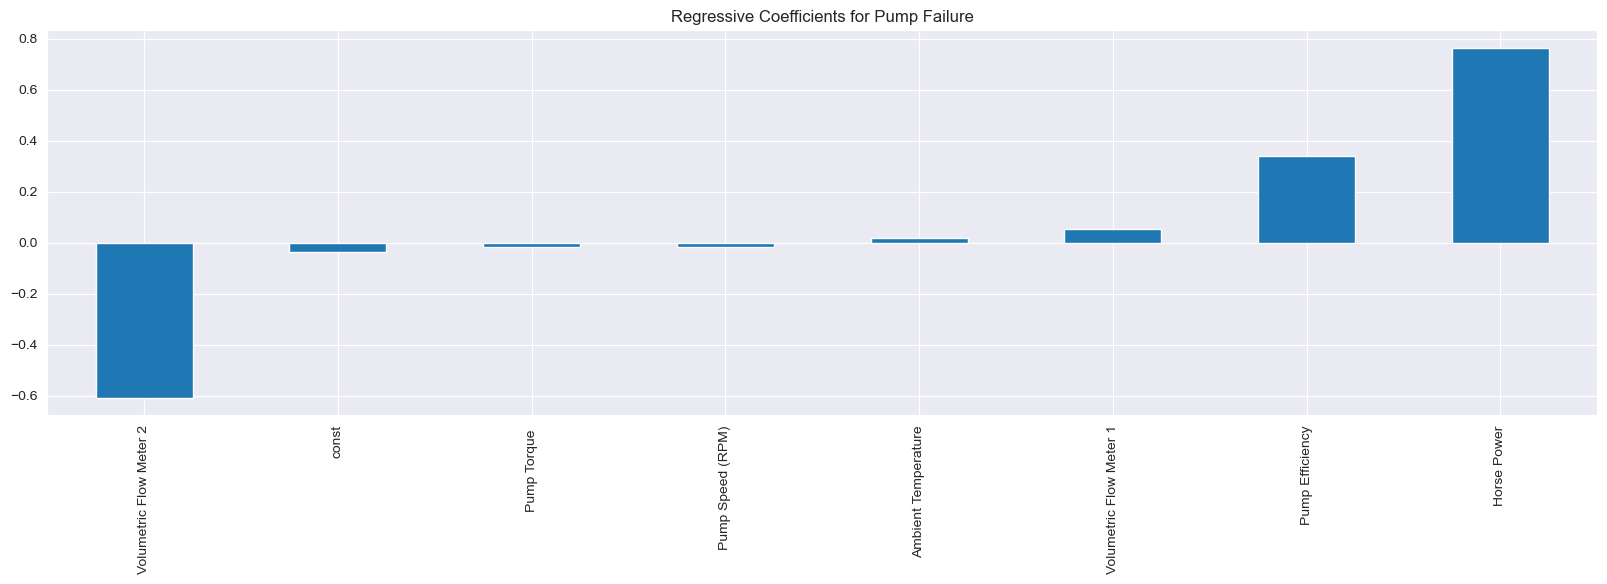

In [30]:
#Using .params method, extract the coefficients from regression_model2
coef = regression_model2.params

#Create bar plot that identifies which coefficients react most strongly with respect to Pump Failure
coef.sort_values().plot(kind='bar',title='Regressive Coefficients for Pump Failure')

* Horse Power, Pump Efficiency, Volumetric Flow Meter 1 showcase the strongest relationship with respect to Pump Failure.


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    


<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>



## Please put your code here

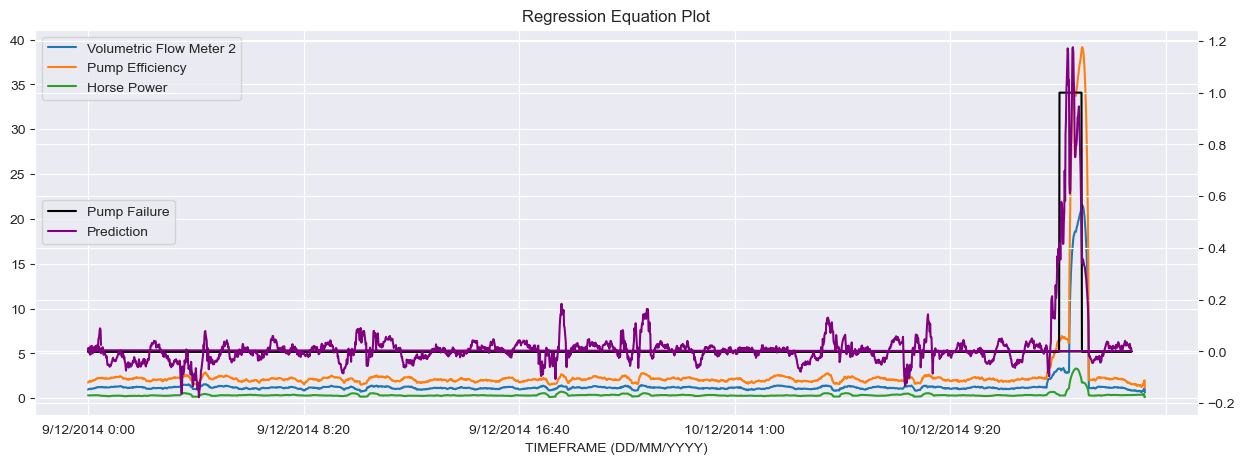

In [48]:
#Create new column in the dataframe_stdev called Prediction to make predictions on independent_ variables data
dataframe_stdev['Prediction'] = regression_model2.predict(independent_variables2)

#Set timeframe on the index
dataframe_stdev_in = dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

#Create a dual axis plot 
ax1 = dataframe_stdev_in[['Volumetric Flow Meter 2', 'Pump Efficiency','Horse Power']].plot(figsize=(15,5))

#create secondary axis
ax2 = ax1.twinx()

#Add Pump failure to secondary axis
ax2.plot(dataframe_stdev_in['PUMP FAILURE (1 or 0)'],color = 'black',label='Pump Failure')

#Add Prediction to secondary axis
ax2.plot(dataframe_stdev_in['Prediction'],color='purple',label='Prediction')
ax2.legend(loc='center left')

#Add title
plt.title('Regression Equation Plot')

#Display the plot
plt.show()



<h3> End of the Case Study </h3>


